In [39]:
%load_ext autoreload
%autoreload 2

In [44]:
from argparse import Namespace
import sys; sys.path.append('.')

from src.data import get_factorized_dataset

import networkx as nx
import pyro
from src.pgm import PGM
import numpy as np
from pomegranate import BayesianNetwork
import matplotlib.pyplot as plt

pyro.enable_validation(True)


In [2]:
dataset = get_factorized_dataset().get(
    ['odor',
     'class',
     'spore-print-color',
     'gill-color',
     'cap-color',
     'cap-shape',
     'cap-surface',
     'gill-size',
     'gill-spacing',
     'gill-attachment',
     'stalk-color-above-ring',
     'stalk-surface-above-ring',
     'stalk-surface-below-ring',
     'stalk-shape'])

DAG=nx.DiGraph()

edges = [
    ('odor','class'),
    ('spore-print-color','class'),
    ('gill-color','class'),
    ('cap-color','class'),
    ('cap-shape','cap-color'),
    ('cap-surface','cap-color'),
    ('gill-size','gill-color'),
    ('gill-spacing','gill-color'),
    ('gill-attachment','gill-color'),
    ('stalk-color-above-ring','class'),
    ('stalk-surface-below-ring','stalk-color-above-ring'),
    ('stalk-surface-above-ring','stalk-color-above-ring'),
    ('stalk-shape','stalk-color-above-ring')
]
DAG.add_edges_from(edges)

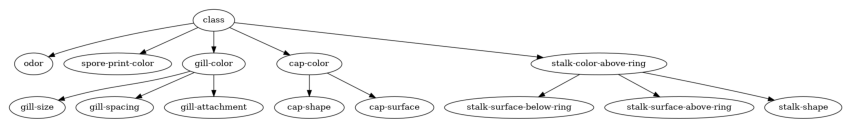

In [47]:
plt.figure(figsize=(15,10))
m = BayesianNetwork()
for o,d in edges:
    m.add_edge(Namespace(name=d),Namespace(name=o))
m.plot()

In [4]:
msk = np.random.rand(len(dataset)) < 0.8
train_data = dataset[msk]
test_data = dataset[~msk]

In [5]:
pgm = PGM(df=dataset, graph=DAG)
pgm.fit(train_data,epochs=5)
pgm.print_statistics(train_data,test_data)

AttributeError: 'DiGraph' object has no attribute 'columns'